# Engineering Management 585 - Fundamentals of Data Science
## Final Project - Customer Segment Analysis
### Team Data 4 - Chen Bian, Lanyu Dong, Naman Satiya

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Step 1: Basic information and visualization of our dataset
The shape of original dataframe is  `(2240, 29)`

x: ID, Age(Year of Birth), Education, Marital_Status, Income, Kidhome, Teenhome


y: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds


In [138]:
#display the basic dataset
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t')
print('The shape of dataframe is {}'.format(df.shape))
display(df.head())

The shape of dataframe is (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


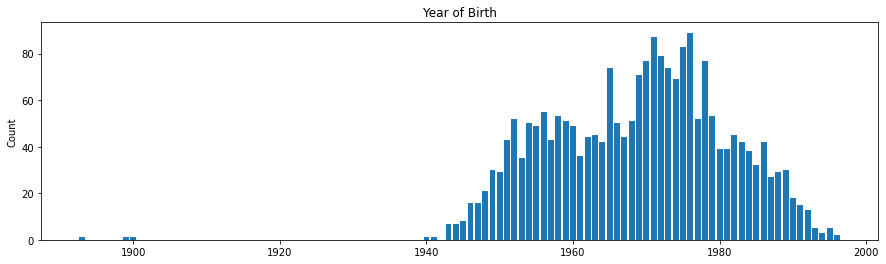

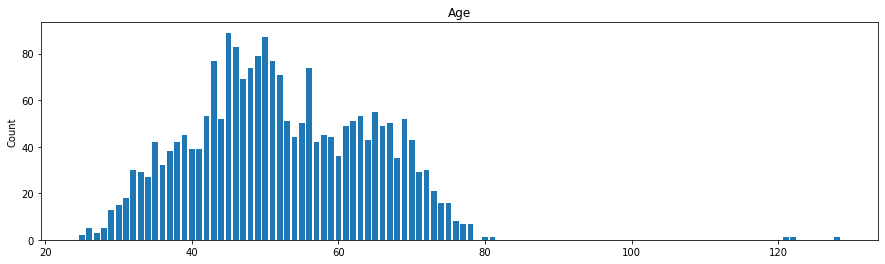

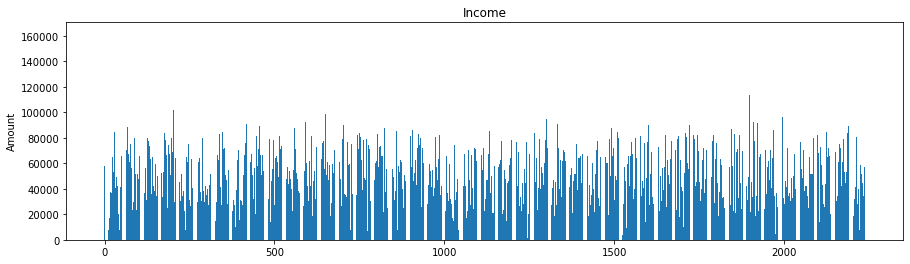

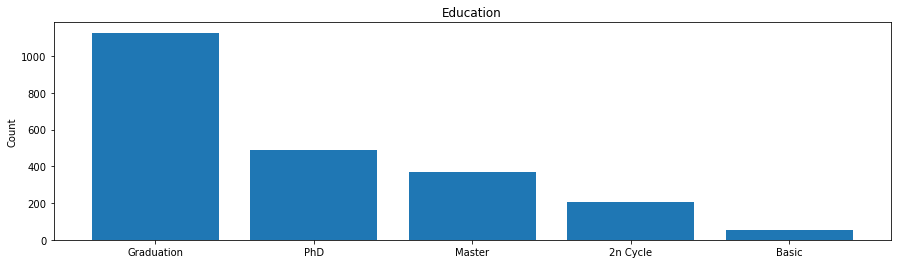

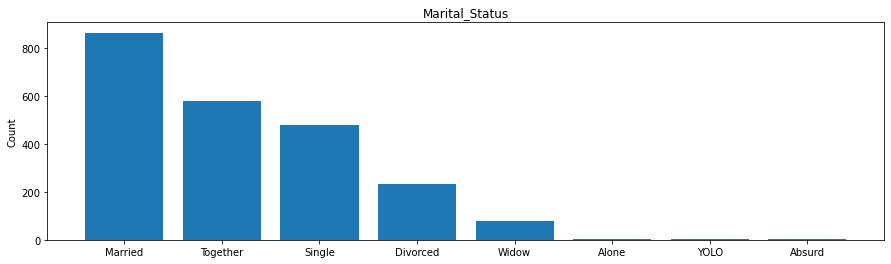

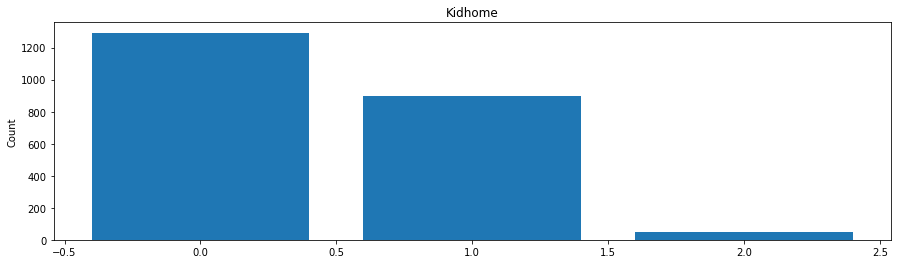

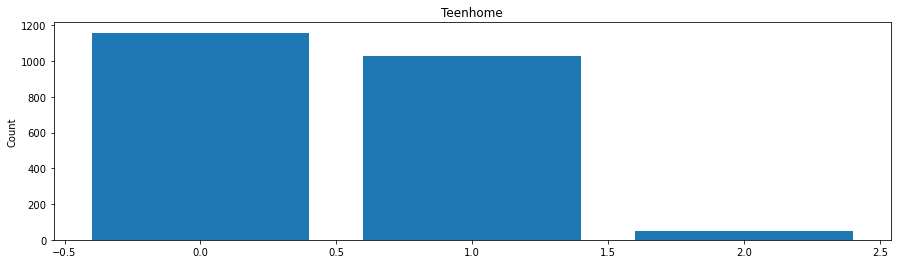

The shape of dataframe is (2240, 30)


In [139]:
#substitute NaN data
df['Income'].replace(np.nan, np.nanmedian(df.Income), inplace=True)
df['Income'].replace(666666.0, np.nanmedian(df.Income), inplace=True)
#change 'Year of birth' into 'Age'
#df['Age'] = 2021-df['Year_Birth']
df.insert(2,'Age',2021-df['Year_Birth'])
#plot of Year of birth
plt.figure(figsize = (15,4))
plt.bar(x = df['Year_Birth'].value_counts().index, height = df['Year_Birth'].value_counts())
plt.ylabel('Count')
plt.title('Year of Birth')
plt.show()
#plot of Age
plt.figure(figsize = (15,4))
plt.bar(x = df['Age'].value_counts().index, height = df['Age'].value_counts())
plt.ylabel('Count')
plt.title('Age')
plt.show()
#df['Year_Birth'].value_counts().plot.bar(figsize = (20,5))
#display(df['Education'].value_counts().plot.bar(figsize = (20,5)))
#plot of Income
plt.figure(figsize = (15,4))
plt.bar(x = df['Income'].index, height = df['Income'])
plt.ylabel('Amount')
plt.title('Income')
plt.show()
#plot of education
plt.figure(figsize = (15,4))
plt.bar(x = df['Education'].value_counts().index, height = df['Education'].value_counts())
plt.ylabel('Count')
plt.title('Education')
plt.show()
#plot of Marital status
plt.figure(figsize = (15,4))
plt.bar(x = df['Marital_Status'].value_counts().index, height = df['Marital_Status'].value_counts())
plt.ylabel('Count')
plt.title('Marital_Status')
plt.show()
#plot of Kidhome
plt.figure(figsize = (15,4))
plt.bar(x = df['Kidhome'].value_counts().index, height = df['Kidhome'].value_counts())
plt.ylabel('Count')
plt.title('Kidhome')
plt.show()
#plot of Teenhome
plt.figure(figsize = (15,4))
plt.bar(x = df['Teenhome'].value_counts().index, height = df['Teenhome'].value_counts())
plt.ylabel('Count')
plt.title('Teenhome')
plt.show()
print('The shape of dataframe is {}'.format(df.shape))

In [140]:
print('the average age: {}'.format(df['Age'].mean()))
print('the average year of birth: {}'.format(df['Year_Birth'].mean()))
print('the average income: {}'.format(df['Income'].mean()))
print('the mode of Education: {}'.format(df['Education'].mode()))
print('the mode of Marital Status: {}'.format(df['Marital_Status'].mode()))
print('the mode of Kidhome: {}'.format(df['Kidhome'].mode()))
print('the mode of Teenhome: {}'.format(df['Teenhome'].mode()))

the average age: 52.19419642857143
the average year of birth: 1968.8058035714287
the average income: 51963.29486607143
the mode of Education: 0    Graduation
dtype: object
the mode of Marital Status: 0    Married
dtype: object
the mode of Kidhome: 0    0
dtype: int64
the mode of Teenhome: 0    0
dtype: int64


## Step 2: Prepare data for training--Split data into training set and test set & Encode categorical variables

`categorical variables` : Education, Marital_Status, Kidhome, Teenhome
<ul>
<li>Onehot encode variables: Kidhome, Teenhome</li>
<li>Ordinal encode variables: Education, Marital_Status</li>

number of training set : number of test set = 8:2


In [141]:
#split dataset into training set and test set
X = df.iloc[:,2:8]
y = df.iloc[:,10:16]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
display(X)
display(y)
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of y_train is {}".format(y_train.shape))
print("The shape of X_test is {}".format(X_test.shape))
print("The shape of y_test is {}".format(y_test.shape))

,Age,Education,Marital_Status,Income,Kidhome,Teenhome
0,64,Graduation,Single,58138.0,0,0
1,67,Graduation,Single,46344.0,1,1
2,56,Graduation,Together,71613.0,0,0
3,37,Graduation,Together,26646.0,1,0
4,40,PhD,Married,58293.0,1,0
...,...,...,...,...,...,...
2235,54,Graduation,Married,61223.0,0,1
2236,75,PhD,Together,64014.0,2,1
2237,40,Graduation,Divorced,56981.0,0,0
2238,65,Master,Together,69245.0,0,1


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


The shape of X_train is (1792, 6)
The shape of y_train is (1792, 6)
The shape of X_test is (448, 6)
The shape of y_test is (448, 6)


In [142]:
#define function that can encode categorical variables of training set
def encode_training_set(X,ord_cols,onehot_cols,num_cols):
    #Ordinal encode
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[ord_cols] = enc.fit_transform(X[ord_cols])
    
    #Onehot encode
    onehot_enc = OneHotEncoder(handle_unknown='ignore')
    onehot_enc.fit(X[onehot_cols])
    colnames = columns = list(onehot_enc.get_feature_names(input_features=onehot_cols))
    onehot_vals = onehot_enc.transform(X[onehot_cols]).toarray()
    enc_df = pd.DataFrame(onehot_vals,columns=colnames,index=X.index)
    X = pd.concat([X,enc_df],axis=1).drop(onehot_cols,axis=1)
    
    #Standardization
    standard = StandardScaler()
    X[num_cols] = standard.fit_transform(X[num_cols])
    
    return X, enc, onehot_enc, standard
    raise NotImplementedError()

In [143]:
# Test cell for encode_training_set() 
X_train_encoded = X_train.copy()

# Make sure all categorical columns are string type
ord_vars = ['Education','Marital_Status']
onehot_vars = ['Kidhome','Teenhome']
num_vars = ['Age','Income']

print('Features to ordinal encode: {}\n'.format(ord_vars))
print('Features to one-hot encode: {}\n'.format(onehot_vars))
print('Features to standardize: {}\n'.format(num_vars))

#X_train_encoded,ord_enc,onehot_enc = encode_training_set(X_train_encoded,ord_vars,onehot_vars)
X_train_encoded,ord_enc,onehot_enc, num_enc= encode_training_set(X_train_encoded,ord_vars,onehot_vars,num_vars)
print('Encoding done')


Features to ordinal encode: ['Education', 'Marital_Status']

Features to one-hot encode: ['Kidhome', 'Teenhome']

Features to standardize: ['Age', 'Income']

Encoding done


In [144]:
def encode_test_set(X,ord_cols,ord_enc,onehot_cols,onehot_enc,num_cols,num_enc):
    #Ordinal encode
    X[ord_cols] = ord_enc.transform(X[ord_cols])
    
    #Onehot encode
    colnames = columns = list(onehot_enc.get_feature_names(input_features=onehot_cols))
    onehot_vals = onehot_enc.transform(X[onehot_cols]).toarray()
    enc_df = pd.DataFrame(onehot_vals,columns=colnames,index=X.index)
    X = pd.concat([X,enc_df],axis=1).drop(onehot_cols,axis=1)
    
    #Standardization
    #X[num_cols] = num_enc.transform(X[num_cols])
    X[num_cols] = num_enc.transform(X[num_cols])
    
    return X
    raise NotImplementedError()

In [145]:
# Test cell for encode_test_set()
X_test_encoded = X_test.copy()
#X_test_encoded = encode_test_set(X_test_encoded,ord_vars,onehot_vars,ord_enc,onehot_enc)
X_test_encoded = encode_test_set(X_test_encoded,ord_vars,ord_enc,onehot_vars,onehot_enc,num_vars,num_enc)
print('Encoding done')

Encoding done


## Step 3: Feature Selection

<Figure size 720x720 with 0 Axes>

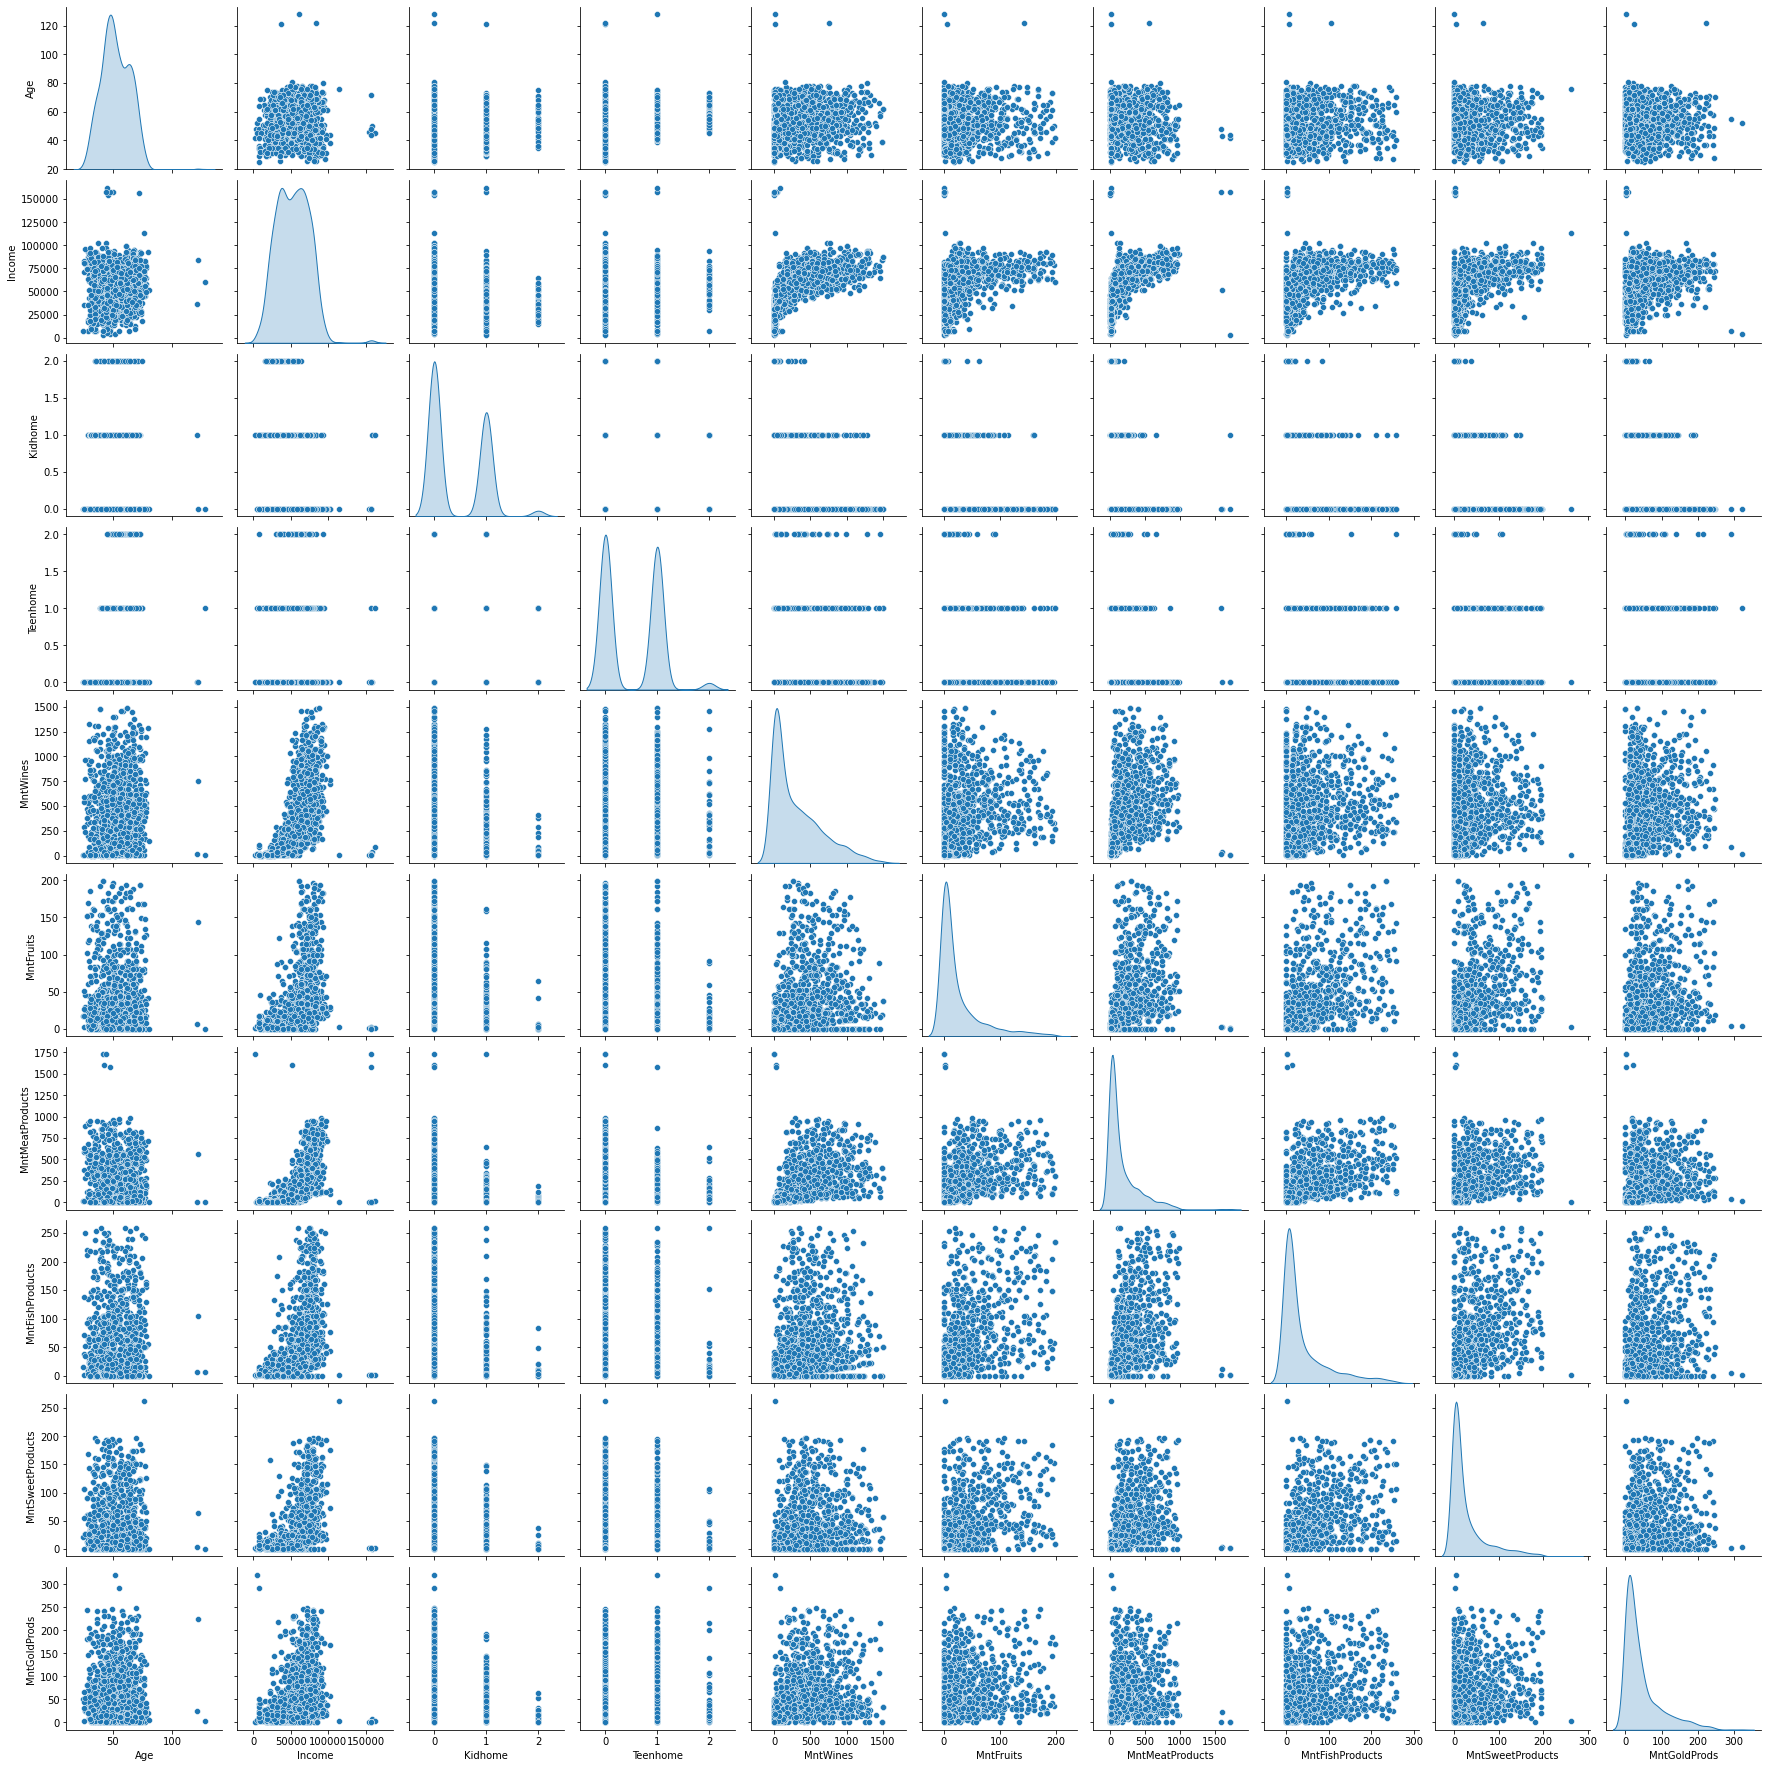

In [146]:
#Plot the relationship of data
plt.figure(figsize=(10,10))
sns.pairplot(data=pd.concat([X_train,y_train],axis=1),diag_kind='kde')
plt.show()

In [147]:
#Calculate Feature scores
columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
feature = pd.DataFrame()
for i,column in enumerate(columns):
    ftest = SelectKBest(score_func=f_regression, k='all')
    ftest.fit(X_train_encoded,y_train[column])
    f_scores = pd.DataFrame(ftest.scores_)
    dfcolumns = pd.DataFrame(X_train_encoded.columns)
    f_scores = pd.concat([dfcolumns,f_scores],axis=1)
    f_scores.columns = ['Feature of {}'.format(column),'F-Score {}'.format(i+1)]  
    f_scores = f_scores.sort_values(by='F-Score {}'.format(i+1),ascending=False)
    f_scores.reset_index(inplace=True)
    f_scores.drop(columns='index',inplace=True)
    feature = pd.concat([feature,f_scores],axis=1)
    #feature= feature.append([f_scores], ignore_index=True) 
feature

,Feature of MntWines,F-Score 1,Feature of MntFruits,F-Score 2,Feature of MntMeatProducts,F-Score 3,Feature of MntFishProducts,F-Score 4,Feature of MntSweetProducts,F-Score 5,Feature of MntGoldProds,F-Score 6
0,Income,1546.356535,Income,573.341545,Income,1457.979170,Income,642.555139,Income,657.955824,Income,305.492334
1,Kidhome_0,618.918251,Kidhome_0,307.876822,Kidhome_0,454.264753,Kidhome_0,335.327378,Kidhome_0,315.671573,Kidhome_0,281.914497
2,Kidhome_1,535.918119,Kidhome_1,271.403726,Kidhome_1,398.631293,Kidhome_1,296.575087,Kidhome_1,277.203250,Kidhome_1,243.325741
3,Education,69.026613,Teenhome_0,67.640606,Teenhome_0,160.226721,Teenhome_0,98.205610,Teenhome_0,55.310923,Education,16.173225
4,Age,51.592577,Teenhome_1,61.145077,Teenhome_1,151.466147,Teenhome_1,87.318870,Teenhome_1,47.302951,Kidhome_2,14.392054
5,Kidhome_2,20.631494,Education,11.662658,Kidhome_2,15.368920,Education,23.064560,Education,20.103796,Age,8.258221
6,Teenhome_2,3.618697,Kidhome_2,11.658367,Age,2.666154,Kidhome_2,11.740754,Kidhome_2,12.466943,Teenhome_1,1.025584
7,Teenhome_1,0.631104,Teenhome_2,1.854338,Marital_Status,1.552777,Age,4.839779,Teenhome_2,3.531510,Teenhome_0,0.702791
8,Marital_Status,0.130559,Age,0.926182,Teenhome_2,1.279436,Teenhome_2,3.428754,Age,0.907264,Teenhome_2,0.349423
9,Teenhome_0,0.056767,Marital_Status,0.037314,Education,0.397447,Marital_Status,1.919689,Marital_Status,0.182710,Marital_Status,0.069325


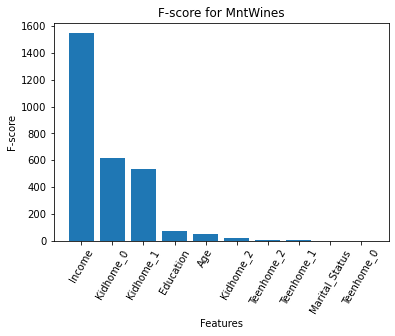

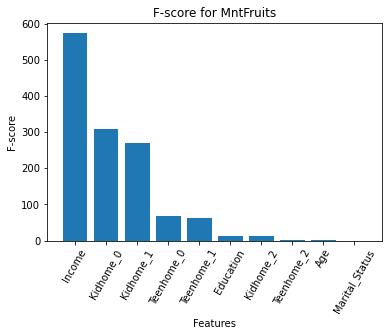

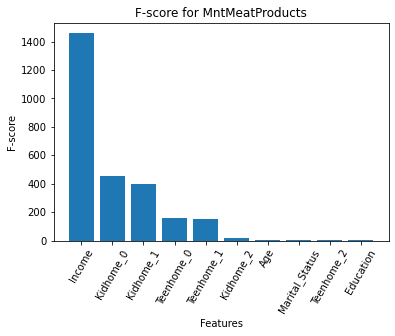

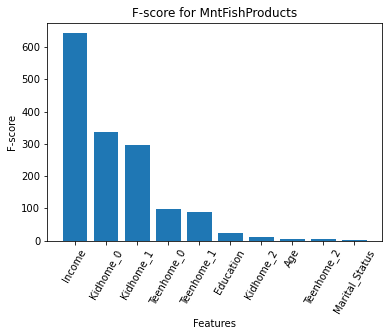

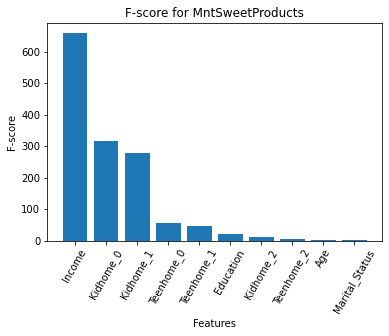

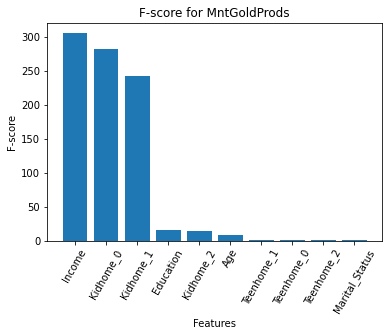

In [148]:
#Visualize F-score
for i,column in enumerate(columns):
    plt.figure(i)
    plt.bar(x=feature['Feature of {}'.format(column)],height=feature['F-Score {}'.format(i+1)])
    plt.xlabel('Features')
    plt.ylabel('F-score')
    plt.title('F-score for {}'.format(column))
    plt.xticks(rotation=60)
    plt.show()

### Scree plot

In [149]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(X_train_encoded)

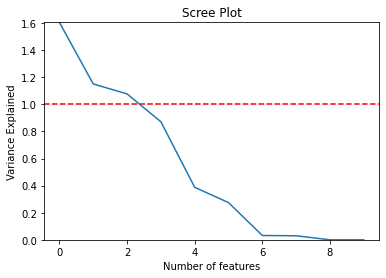

In [150]:
#PC_values = np.arange(pca.n_components_) + 1
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of features')
plt.ylabel('Variance Explained')
plt.ylim(0,max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

## Step 4: Modeling

### Try to predict 6 products

In [151]:
#divide y into 6y(s)
y_train_wine = y_train.iloc[:,0:1]
y_train_fruit = y_train.iloc[:,1:2]
y_train_meat = y_train.iloc[:,2:3]
y_train_fish = y_train.iloc[:,3:4]
y_train_sweet = y_train.iloc[:,4:5]
y_train_gold = y_train.iloc[:,5:6]
y_test_wine = y_test.iloc[:,0:1]
y_test_fruit = y_test.iloc[:,1:2]
y_test_meat = y_test.iloc[:,2:3]
y_test_fish = y_test.iloc[:,3:4]
y_test_sweet = y_test.iloc[:,4:5]
y_test_gold = y_test.iloc[:,5:6]


#include features that have high scores
X_train_encoded_wine = X_train_encoded.drop(columns = ['Teenhome_0','Teenhome_1','Marital_Status','Teenhome_2'])
X_test_encoded_wine = X_test_encoded.drop(columns = ['Teenhome_0','Teenhome_1','Marital_Status','Teenhome_2'])
model.fit(X_train_encoded_wine,y_train_wine)
testpreds = model.predict(X_test_encoded_wine)
r2_wine = r2_score(y_test_wine,testpreds)
print('The R square of predicting Wine products purchase is : {}%'.format(round(r2_wine*100,3)))

X_train_encoded_fruit = X_train_encoded.drop(columns = ['Age','Marital_Status','Teenhome_2','Kidhome_2'])
X_test_encoded_fruit = X_test_encoded.drop(columns = ['Age','Marital_Status','Teenhome_2','Kidhome_2'])
model.fit(X_train_encoded_fruit,y_train_fruit)
testpreds = model.predict(X_test_encoded_fruit)
r2_fruit = r2_score(y_test_fruit,testpreds)
print('The R square of predicting Fruit products purchase is : {}%'.format(round(r2_fruit*100,3)))

X_train_encoded_meat = X_train_encoded.drop(columns = ['Age','Marital_Status','Teenhome_2','Education'])
X_test_encoded_meat = X_test_encoded.drop(columns = ['Age','Marital_Status','Teenhome_2','Education'])
model.fit(X_train_encoded_meat,y_train_meat)
testpreds = model.predict(X_test_encoded_meat)
r2_meat = r2_score(y_test_meat,testpreds)
print('The R square of predicting Meat products purchase is : {}%'.format(round(r2_meat*100,3)))

X_train_encoded_fish = X_train_encoded.drop(columns = ['Age','Teenhome_2','Marital_Status','Kidhome_2'])
X_test_encoded_fish = X_test_encoded.drop(columns = ['Age','Teenhome_2','Marital_Status','Kidhome_2'])
model.fit(X_train_encoded_fish,y_train_fish)
testpreds = model.predict(X_test_encoded_fish)
r2_fish = r2_score(y_test_fish,testpreds)
print('The R square of predicting Fish products purchase is : {}%'.format(round(r2_fish*100,3)))

X_train_encoded_sweet = X_train_encoded.drop(columns = ['Age','Teenhome_2','Marital_Status','Kidhome_2'])
X_test_encoded_sweet = X_test_encoded.drop(columns = ['Age','Teenhome_2','Marital_Status','Kidhome_2'])
model.fit(X_train_encoded_sweet,y_train_sweet)
testpreds = model.predict(X_test_encoded_sweet)
r2_sweet = r2_score(y_test_fish,testpreds)
print('The R square of predicting Sweet products purchase is : {}%'.format(round(r2_sweet*100,3)))

X_train_encoded_gold = X_train_encoded.drop(columns = ['Marital_Status','Teenhome_0','Teenhome_1','Teenhome_2'])
X_test_encoded_gold = X_test_encoded.drop(columns = ['Marital_Status','Teenhome_0','Teenhome_1','Teenhome_2'])
model.fit(X_train_encoded_gold,y_train_gold)
testpreds = model.predict(X_test_encoded_gold)
r2_gold = r2_score(y_test_gold,testpreds)
print('The R square of predicting Gold products purchase is : {}%'.format(round(r2_gold*100,3)))

The R square of predicting Wine products purchase is : 54.965%
The R square of predicting Fruit products purchase is : 38.129%
The R square of predicting Meat products purchase is : 64.178%
The R square of predicting Fish products purchase is : 38.253%
The R square of predicting Sweet products purchase is : 31.42%
The R square of predicting Gold products purchase is : 19.95%


### Try to predict total spending

In [152]:
#try to use pipeline method (input 10 features)

X_train_spending = X_train.copy()
y_train_spending = y_train.copy()
y_train_spending['Spending'] = y_train_spending['MntWines']+y_train_spending['MntFruits']+y_train_spending['MntMeatProducts']+y_train_spending['MntFishProducts']+y_train_spending['MntSweetProducts']+y_train_spending['MntGoldProds']

X_test_spending = X_test.copy()
y_test_spending = y_test.copy()
y_test_spending['Spending'] = y_test_spending['MntWines']+y_test_spending['MntFruits']+y_test_spending['MntMeatProducts']+y_test_spending['MntFishProducts']+y_test_spending['MntSweetProducts']+y_test_spending['MntGoldProds']

numeric_features = ['Age','Income']
numeric_transformer = Pipeline(steps=
                               [("fill_missing", SimpleImputer(strategy="median")), 
                                ("scaler", StandardScaler())])

# Create transformer for categorical features
# Fill missing values with mode and then one-hot encode
categorical_features = ['Kidhome','Teenhome']

# Convert all to strings
for feat in categorical_features:
    X_train_copy[feat]=X_train_copy[feat].astype(str)
    X_test_copy[feat]=X_test_copy[feat].astype(str)

#Create transformer for ordinal features
ordinal_features = ['Education','Marital_Status']
ordinal_transformer = Pipeline(steps=
                               [("fill_missing", SimpleImputer(strategy="most_frequent")), 
                                ("encoder",OrdinalEncoder(handle_unknown="ignore"))])
    
# Create transformer pipeline for categorical data
categorical_transformer = Pipeline(steps=
                                   [("fill_missing",SimpleImputer(strategy="most_frequent")),
                                    ("encoder",OneHotEncoder(handle_unknown="ignore"))])

# Combine the two transformers into single ColumnTransformer preprocessor
preprocessor = ColumnTransformer(transformers=
                                 [("num", numeric_transformer, numeric_features),
                                  ("ord", ordinal_transformer, ordinal_features),
                                  ("cat", categorical_transformer, categorical_features)])

# Create pipeline with preprocessor and model
model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", LinearRegression())])

# Fit the pipeline on the training data
model_pipeline.fit(X_train_spending, y_train_spending['Spending'])

# Use the pipeline to get predictions on test set and evaluate
test_preds = model_pipeline.predict(X_test_spending)
r2 = r2_score(y_test_spending['Spending'],test_preds)
print("R-squared on test set: {:.3f}".format(r2))

R-squared on test set: 0.737


In [153]:
#input 6 features()
X_train_encoded_part = X_train_encoded.drop(columns = ['Age','Marital_Status','Teenhome_1','Teenhome_2'])
X_test_encoded_part = X_test_encoded.drop(columns = ['Age','Marital_Status','Teenhome_1','Teenhome_2'])
model = Ridge(alpha = 0.01)
model.fit(X_train_encoded_part,y_train_spending['Spending'])
testpreds = model.predict(X_test_encoded_part)
r2 = r2_score(y_test_spending['Spending'],testpreds)
print("The model's R-squared value on the test set(total spending) is {:.3f}".format(r2))

The model's R-squared value on the test set(total spending) is 0.738
